# 数据可视化示例

在这个 Notebook 中，我们将学习使用 matplotlib、seaborn 和 plotly 创建各种类型的图表。

## 1. 导入库和准备数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 设置中文字体 - 改进版本
import matplotlib.font_manager as fm
import warnings

# 获取系统可用的中文字体
def get_chinese_fonts():
    chinese_fonts = []
    common_fonts = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi', 'FangSong', 'STHeiti']
    system_fonts = [f.name for f in fm.fontManager.ttflist]
    for font in common_fonts:
        if font in system_fonts:
            chinese_fonts.append(font)
    return chinese_fonts

# 设置字体
available_fonts = get_chinese_fonts()
if available_fonts:
    plt.rcParams['font.sans-serif'] = available_fonts + ['DejaVu Sans']
    print(f'使用中文字体: {available_fonts[0]}')
else:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print('警告: 未找到中文字体，建议安装中文字体包')

plt.rcParams['axes.unicode_minus'] = False

# 抑制字体警告
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 设置图表样式
sns.set_style('whitegrid')

print('库导入成功！')

使用中文字体: Microsoft YaHei
库导入成功！


In [2]:
# 创建更丰富的示例数据
np.random.seed(42)  # 设置随机种子，确保结果可重现

# 销售数据
months = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
products = ['产品A', '产品B', '产品C', '产品D']
regions = ['北区', '南区', '东区', '西区']

# 生成销售数据
sales_data = []
for month in months:
    for product in products:
        for region in regions:
            sales = np.random.randint(50, 200)
            profit = sales * np.random.uniform(0.1, 0.3)
            sales_data.append({
                '月份': month,
                '产品': product,
                '地区': region,
                '销售额': sales,
                '利润': round(profit, 2)
            })

df_sales = pd.DataFrame(sales_data)

# 学生成绩数据
students_data = {
    '姓名': [f'学生{i}' for i in range(1, 51)],
    '数学': np.random.normal(75, 15, 50).astype(int),
    '语文': np.random.normal(80, 12, 50).astype(int),
    '英语': np.random.normal(70, 18, 50).astype(int),
    '班级': np.random.choice(['A班', 'B班', 'C班'], 50)
}

df_students = pd.DataFrame(students_data)

print('数据创建完成！')
print(f'销售数据形状：{df_sales.shape}')
print(f'学生数据形状：{df_students.shape}')

数据创建完成！
销售数据形状：(192, 5)
学生数据形状：(50, 5)


## 2. Matplotlib 基础图表

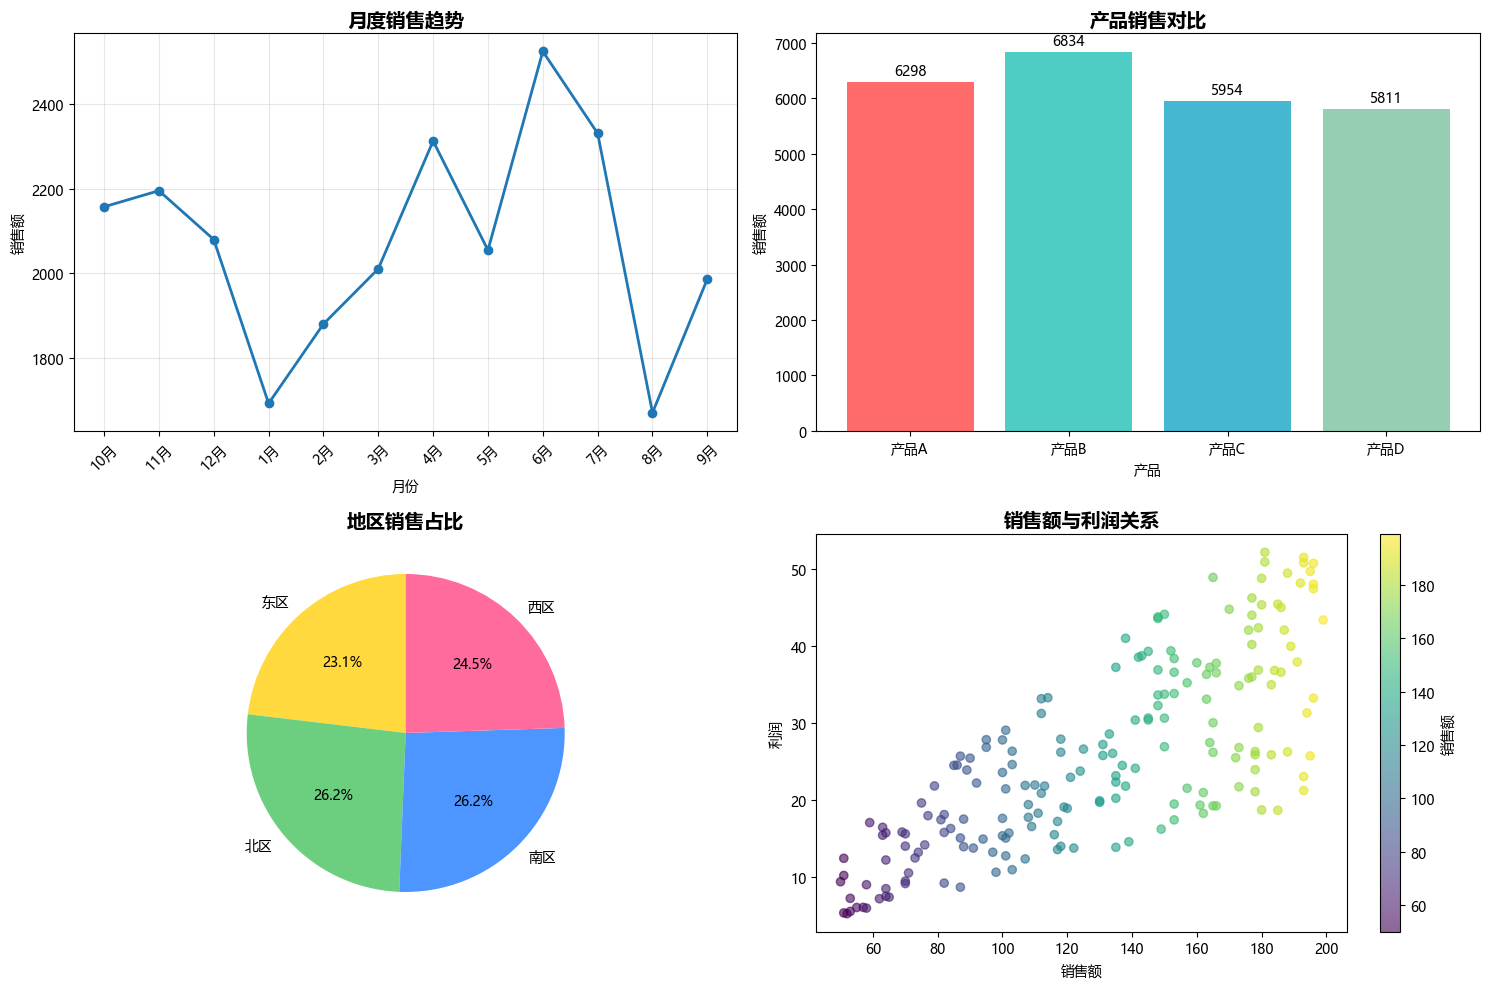

In [19]:
# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# import fix_chinese_font
# exec(open('fix_chinese_font.py', encoding='utf-8').read())
# fix_chinese_font()

# 1. 折线图 - 月度销售趋势
monthly_sales = df_sales.groupby('月份')['销售额'].sum()
axes[0, 0].plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('月度销售趋势', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('月份')
axes[0, 0].set_ylabel('销售额')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. 柱状图 - 产品销售对比
product_sales = df_sales.groupby('产品')['销售额'].sum()
bars = axes[0, 1].bar(product_sales.index, product_sales.values, 
                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 1].set_title('产品销售对比', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('产品')
axes[0, 1].set_ylabel('销售额')

# 在柱状图上添加数值标签
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'{int(height)}', ha='center', va='bottom')

# 3. 饼图 - 地区销售占比
region_sales = df_sales.groupby('地区')['销售额'].sum()
colors = ['#FFD93D', '#6BCF7F', '#4D96FF', '#FF6B9D']
wedges, texts, autotexts = axes[1, 0].pie(region_sales.values, labels=region_sales.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('地区销售占比', fontsize=14, fontweight='bold')

# 4. 散点图 - 销售额与利润关系
scatter = axes[1, 1].scatter(df_sales['销售额'], df_sales['利润'], 
                           alpha=0.6, c=df_sales['销售额'], cmap='viridis')
axes[1, 1].set_title('销售额与利润关系', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('销售额')
axes[1, 1].set_ylabel('利润')
plt.colorbar(scatter, ax=axes[1, 1], label='销售额')

plt.tight_layout()
plt.show()

## 3. Seaborn 高级图表

✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong


<string>:110: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




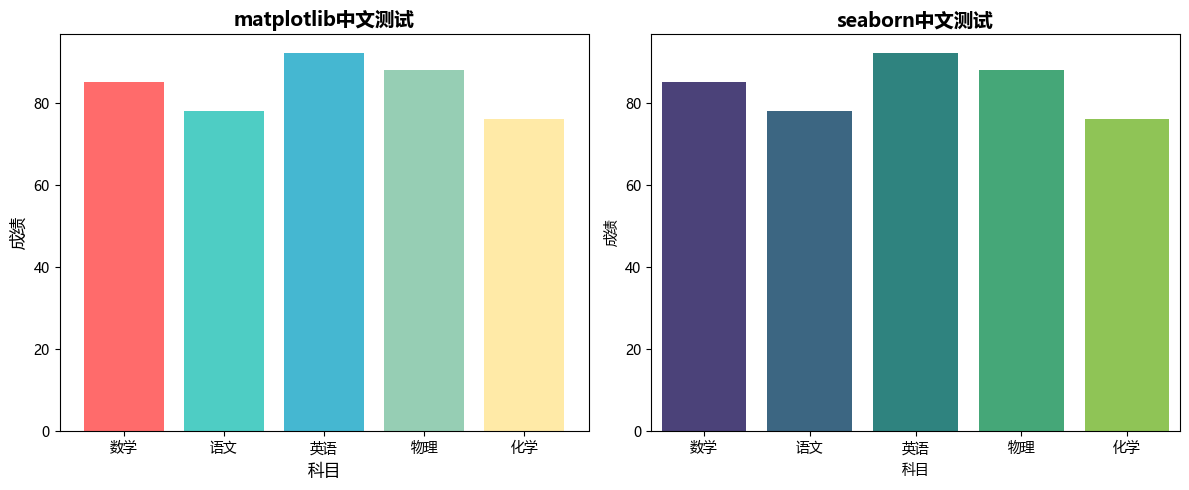

🎯 如果上面的图表中文显示正常，说明字体设置成功！
✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong


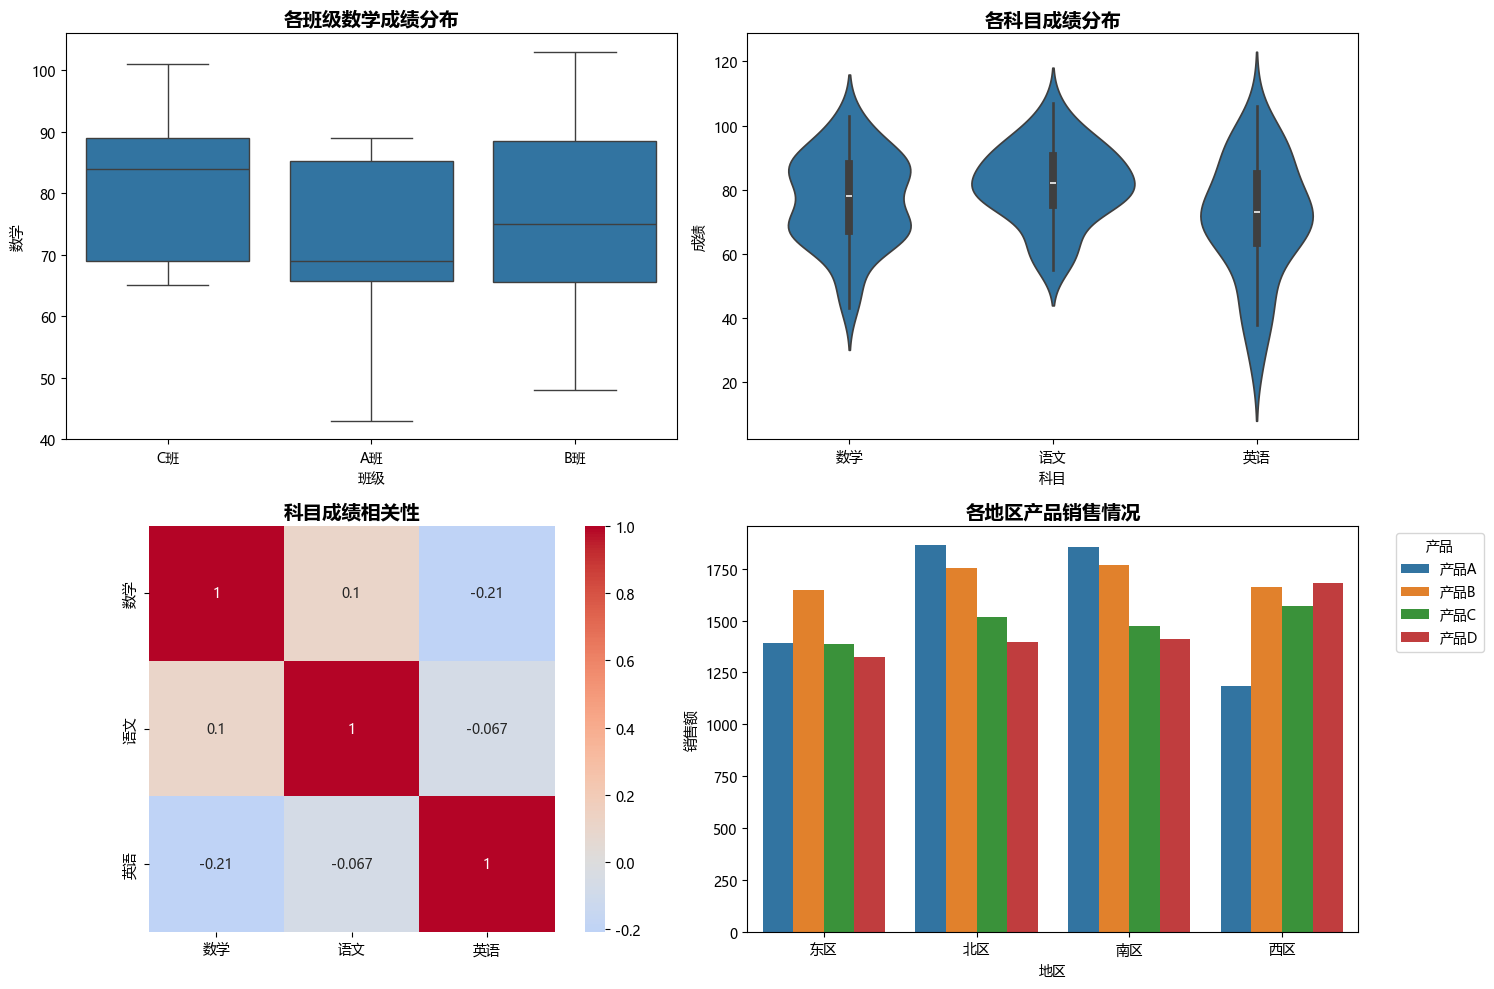

In [20]:
import fix_chinese_font
exec(open('fix_chinese_font.py', encoding='utf-8').read())
fix_chinese_font()

# 创建 seaborn 图表
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 箱线图 - 各班级成绩分布
sns.boxplot(data=df_students, x='班级', y='数学', ax=axes[0, 0])
axes[0, 0].set_title('各班级数学成绩分布', fontsize=14, fontweight='bold')

# 2. 小提琴图 - 成绩分布
df_scores = df_students[['数学', '语文', '英语']].melt(var_name='科目', value_name='成绩')
sns.violinplot(data=df_scores, x='科目', y='成绩', ax=axes[0, 1])
axes[0, 1].set_title('各科目成绩分布', fontsize=14, fontweight='bold')

# 3. 热力图 - 科目相关性
correlation = df_students[['数学', '语文', '英语']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
           square=True, ax=axes[1, 0])
axes[1, 0].set_title('科目成绩相关性', fontsize=14, fontweight='bold')

# 4. 分组柱状图 - 地区产品销售
region_product = df_sales.groupby(['地区', '产品'])['销售额'].sum().reset_index()
sns.barplot(data=region_product, x='地区', y='销售额', hue='产品', ax=axes[1, 1])
axes[1, 1].set_title('各地区产品销售情况', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='产品', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 4. Plotly 交互式图表

In [13]:
# 1. 交互式折线图
monthly_product_sales = df_sales.groupby(['月份', '产品'])['销售额'].sum().reset_index()

fig = px.line(monthly_product_sales, x='月份', y='销售额', color='产品',
              title='各产品月度销售趋势（交互式）',
              markers=True, line_shape='spline')

fig.update_layout(
    title_font_size=16,
    xaxis_title='月份',
    yaxis_title='销售额',
    hovermode='x unified'
)

fig.show()

In [6]:
# 2. 交互式散点图
fig = px.scatter(df_sales, x='销售额', y='利润', color='产品', size='销售额',
                hover_data=['地区', '月份'],
                title='销售额与利润关系（交互式）',
                opacity=0.7)

fig.update_layout(
    title_font_size=16,
    xaxis_title='销售额',
    yaxis_title='利润'
)

fig.show()

In [7]:
# 3. 3D 散点图
fig = px.scatter_3d(df_students, x='数学', y='语文', z='英语', color='班级',
                   title='三科成绩3D分布',
                   opacity=0.7)

fig.update_layout(
    title_font_size=16,
    scene=dict(
        xaxis_title='数学成绩',
        yaxis_title='语文成绩',
        zaxis_title='英语成绩'
    )
)

fig.show()

## 5. 综合仪表板

In [8]:
# 创建综合仪表板
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('月度销售趋势', '产品销售占比', '地区销售对比', '销售利润分析'),
    specs=[[{'type': 'scatter'}, {'type': 'pie'}],
           [{'type': 'bar'}, {'type': 'scatter'}]]
)

# 1. 月度销售趋势
monthly_total = df_sales.groupby('月份')['销售额'].sum()
fig.add_trace(
    go.Scatter(x=monthly_total.index, y=monthly_total.values,
              mode='lines+markers', name='月度销售',
              line=dict(color='#1f77b4', width=3)),
    row=1, col=1
)

# 2. 产品销售占比
product_total = df_sales.groupby('产品')['销售额'].sum()
fig.add_trace(
    go.Pie(labels=product_total.index, values=product_total.values,
          name='产品占比'),
    row=1, col=2
)

# 3. 地区销售对比
region_total = df_sales.groupby('地区')['销售额'].sum()
fig.add_trace(
    go.Bar(x=region_total.index, y=region_total.values,
          name='地区销售', marker_color='lightblue'),
    row=2, col=1
)

# 4. 销售利润分析
fig.add_trace(
    go.Scatter(x=df_sales['销售额'], y=df_sales['利润'],
              mode='markers', name='销售利润',
              marker=dict(color=df_sales['销售额'], colorscale='Viridis',
                         showscale=True, size=8, opacity=0.7)),
    row=2, col=2
)

# 更新布局
fig.update_layout(
    title_text='销售数据综合仪表板',
    title_font_size=20,
    showlegend=False,
    height=800
)

fig.show()

## 6. 动画图表

In [9]:
# 创建动画柱状图
# 准备动画数据
monthly_product = df_sales.groupby(['月份', '产品'])['销售额'].sum().reset_index()

fig = px.bar(monthly_product, x='产品', y='销售额', color='产品',
            animation_frame='月份',
            title='各产品月度销售动画',
            range_y=[0, monthly_product['销售额'].max() * 1.1])

fig.update_layout(
    title_font_size=16,
    xaxis_title='产品',
    yaxis_title='销售额'
)

fig.show()

## 7. 自定义图表样式

✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong


<string>:110: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




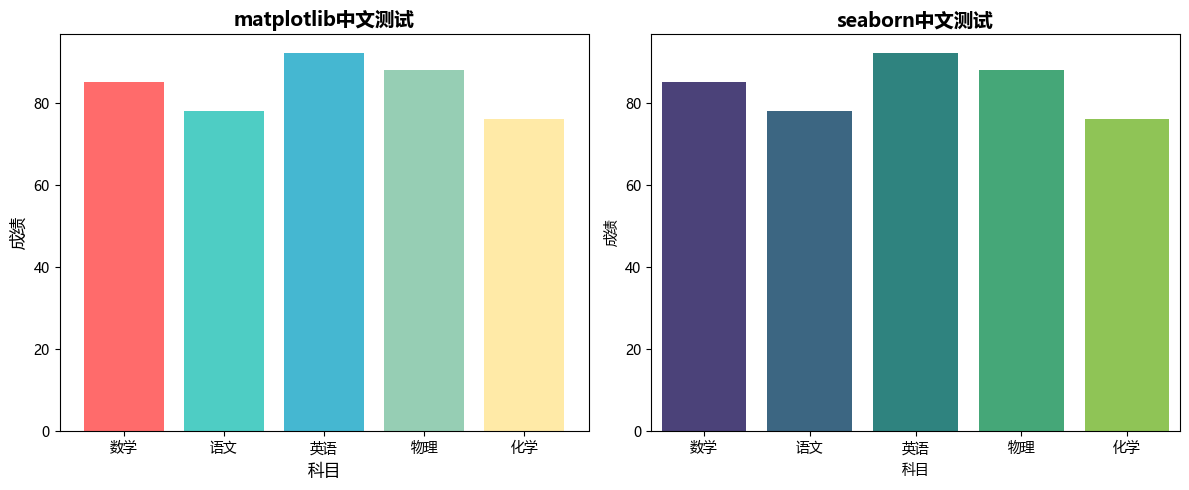

🎯 如果上面的图表中文显示正常，说明字体设置成功！
✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong
✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong


<string>:110: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




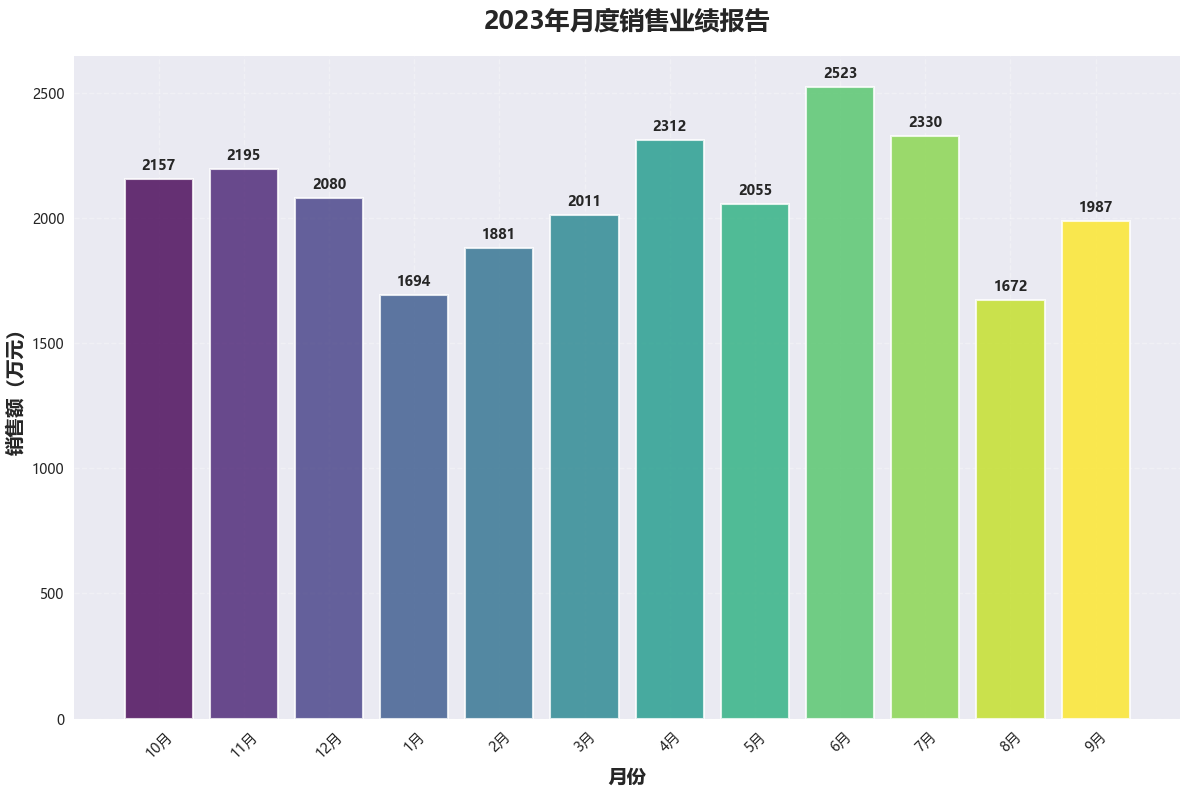

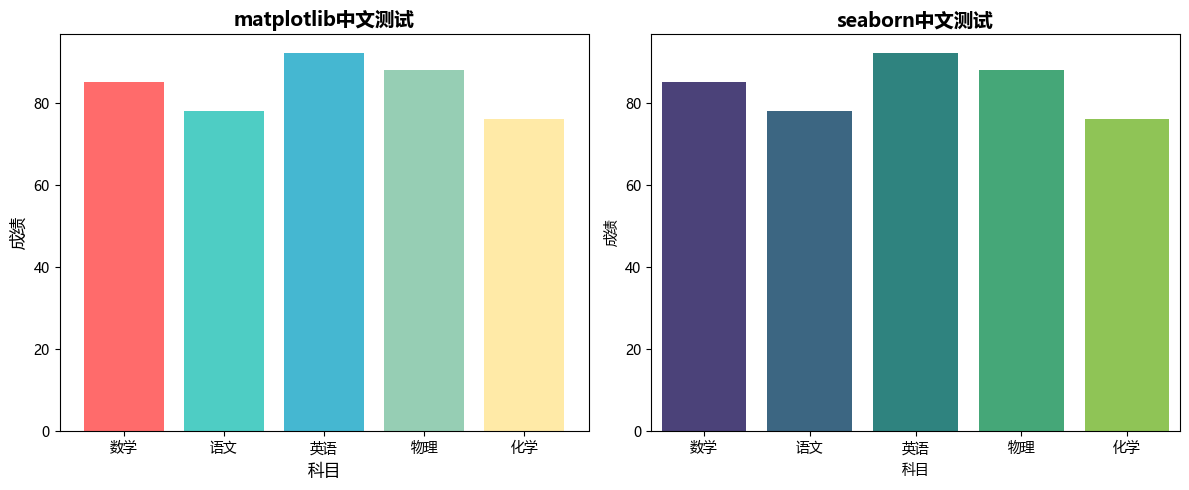

🎯 如果上面的图表中文显示正常，说明字体设置成功！
✅ 中文字体设置成功: Microsoft YaHei
📋 可用字体列表: Microsoft YaHei, SimHei, SimSun, KaiTi, FangSong


In [29]:
import fix_chinese_font
exec(open('fix_chinese_font.py', encoding='utf-8').read())
fix_chinese_font()

# 创建美观的自定义图表
plt.style.use('seaborn-v0_8')  # 使用 seaborn 样式

fig, ax = plt.subplots(figsize=(12, 8))

# 数据准备
monthly_sales = df_sales.groupby('月份')['销售额'].sum()

# 创建渐变色
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_sales)))

# 绘制柱状图
bars = ax.bar(monthly_sales.index, monthly_sales.values, color=colors, 
             edgecolor='white', linewidth=1.5, alpha=0.8)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
           f'{int(height)}', ha='center', va='bottom', 
           fontsize=10, fontweight='bold')

# 自定义样式
ax.set_title('2023年月度销售业绩报告', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('月份', fontsize=14, fontweight='bold')
ax.set_ylabel('销售额（万元）', fontsize=14, fontweight='bold')

# 设置网格
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# 旋转x轴标签
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

import fix_chinese_font
exec(open('fix_chinese_font.py', encoding='utf-8').read())
fix_chinese_font()

# 添加注释
ax.annotate('销售高峰', xy=(monthly_sales.idxmax(), monthly_sales.max()),
           xytext=(monthly_sales.idxmax(), monthly_sales.max() + 200),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=12, fontweight='bold', color='red')

plt.show()

## 8. 实践练习

In [11]:
# 练习：创建一个完整的数据分析报告
print('=== 数据可视化分析报告 ===')
print()

# 1. 总体概况
total_sales = df_sales['销售额'].sum()
total_profit = df_sales['利润'].sum()
avg_profit_margin = (total_profit / total_sales) * 100

print(f'📊 总体业绩概况：')
print(f'   总销售额：{total_sales:,} 万元')
print(f'   总利润：{total_profit:,.2f} 万元')
print(f'   平均利润率：{avg_profit_margin:.1f}%')
print()

# 2. 最佳表现
best_month = df_sales.groupby('月份')['销售额'].sum().idxmax()
best_product = df_sales.groupby('产品')['销售额'].sum().idxmax()
best_region = df_sales.groupby('地区')['销售额'].sum().idxmax()

print(f'🏆 最佳表现：')
print(f'   最佳销售月份：{best_month}')
print(f'   最佳销售产品：{best_product}')
print(f'   最佳销售地区：{best_region}')
print()

# 3. 学生成绩分析
print(f'📚 学生成绩分析：')
for subject in ['数学', '语文', '英语']:
    avg_score = df_students[subject].mean()
    max_score = df_students[subject].max()
    min_score = df_students[subject].min()
    print(f'   {subject}：平均{avg_score:.1f}分，最高{max_score}分，最低{min_score}分')

print('\n✅ 数据可视化学习完成！')

=== 数据可视化分析报告 ===

📊 总体业绩概况：
   总销售额：24,897 万元
   总利润：4,917.16 万元
   平均利润率：19.8%

🏆 最佳表现：
   最佳销售月份：6月
   最佳销售产品：产品B
   最佳销售地区：北区

📚 学生成绩分析：
   数学：平均76.6分，最高103分，最低43分
   语文：平均81.6分，最高107分，最低55分
   英语：平均71.1分，最高106分，最低25分

✅ 数据可视化学习完成！


## 总结

在这个 Notebook 中，我们学习了：

### 📈 图表类型
- **折线图**：显示趋势变化
- **柱状图**：比较不同类别
- **饼图**：显示占比关系
- **散点图**：显示相关性
- **箱线图**：显示数据分布
- **热力图**：显示相关性矩阵

### 🛠️ 工具库
- **Matplotlib**：基础绘图库，灵活性高
- **Seaborn**：统计图表，样式美观
- **Plotly**：交互式图表，功能强大

### 💡 最佳实践
1. **选择合适的图表类型**
2. **使用清晰的标题和标签**
3. **选择合适的颜色方案**
4. **添加必要的注释和说明**
5. **保持图表简洁明了**

### 🎯 下一步学习
- 学习更多高级可视化技巧
- 探索其他可视化库（如 Bokeh、Altair）
- 学习制作交互式仪表板
- 掌握地理数据可视化

恭喜您完成了 Jupyter Notebook 的学习之旅！🎉